# Sklearn pipelines

By Alberto Valdés 

**Mail 1:** anvaldes@uc.cl 

**Mail 2:** alberto.valdes.gonzalez.96@gmail.com

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import time

In [3]:
start = time.time()

In [4]:
from matplotlib import image as mpimg
import matplotlib.pyplot as plt

In [5]:
def display_img(name, a, b):
    plt.figure(figsize = (a, b))
    image = mpimg.imread(name)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

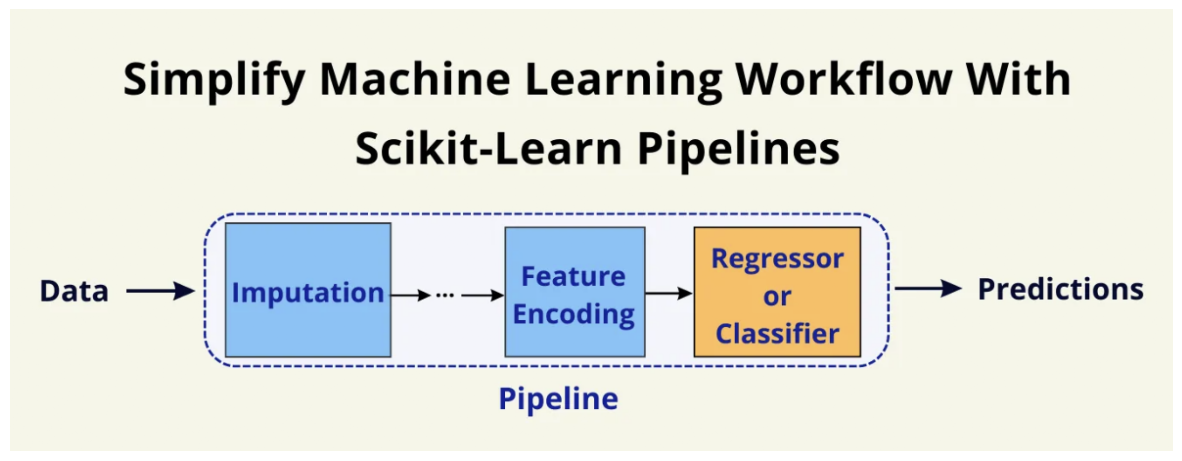

In [6]:
display_img('sklearn_pipeline.png', 15, 10)

The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters. For this, it enables setting parameters of the various steps using their names and the parameter name separated by a '__', as in the example below. A step’s estimator may be replaced entirely by setting the parameter with its name to another estimator, or a transformer removed by setting it to 'passthrough' or None.

### General Structure

**Preprocessing:**
1. Fill NaNs/Indicator for NaNs.
2. Encoding categorical variables.
3. Feature Transformation.
4. Standarize/Scale features.

**Training:**
1. Train the model.

**Calibration:**
1. Train the calibration.

In [7]:
!pip install -q xgboost

In [8]:
import time
import warnings
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from matplotlib.pyplot import figure
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.exceptions import DataConversionWarning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer

warnings.simplefilter("ignore")
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [9]:
def compute_auc(y, y_pred):

    fpr, tpr, thresholds = metrics.roc_curve(y, y_pred, pos_label=1)

    return metrics.auc(fpr, tpr)

In [10]:
X_cols = [f'V{i}' for i in range(1, 28 + 1)]
X_cols = X_cols + ['Amount']

y_col = ['Class']

# 1. Leer el DF

In [11]:
df = pd.read_csv('creditcard.csv')

In [12]:
X = df[X_cols].copy()
y = df[y_col].copy()

In [13]:
X.isna().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
dtype: int64

In [14]:
y.isna().sum()

Class    0
dtype: int64

# 2. Train with pipeline

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

In [16]:
clf = XGBClassifier(n_estimators = 10, max_depth = 4)

In [17]:
pipe = Pipeline([('scaler', StandardScaler()), ('clf', clf)])

In [18]:
pipe = pipe.fit(X_train, y_train)

In [19]:
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

In [20]:
recall_train = recall_score(y_train, y_train_pred)
recall_test = recall_score(y_test, y_test_pred)

In [21]:
print('Recall Train:', round(recall_train*100, 2))
print('Recall Test:', round(recall_test*100, 2))

Recall Train: 82.34
Recall Test: 78.72


# 3. Pipeline with all the steps

In [22]:
df = pd.read_csv('credit_risk.csv')

In [23]:
df['loan_status'].value_counts()

0    25473
1     7108
Name: loan_status, dtype: int64

In [24]:
round(df['loan_status'].value_counts(normalize = True)*100, 2)

0    78.18
1    21.82
Name: loan_status, dtype: float64

In [25]:
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                      255
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [26]:
df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                     float64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

### i. Types of variables

**Comments 1:** Ensure the NaN presence in the type of features num_mean_nan and num_zero_nan.

In [27]:
cat_str = ['person_home_ownership', 'loan_intent']
cat_oh = ['cb_person_default_on_file', 'loan_grade']

num_mean = ['person_age', 'person_income', 'loan_percent_income']
num_zero = ['cb_person_cred_hist_length']

num_mean_nan = ['loan_int_rate', 'person_emp_length']
num_zero_nan = ['loan_amnt']

X_cols = cat_str + cat_oh + num_mean + num_zero + num_mean_nan + num_zero_nan

label = ['loan_status']

In [28]:
df.shape

(32581, 12)

In [29]:
len(X_cols)

11

In [30]:
set(X_cols + label) == set(list(df.columns)) 

True

In [31]:
X = df[X_cols]
y = df[label]

In [32]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.40, random_state = 10)

In [33]:
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size = 0.50, random_state = 10)

**Comments 2:** Reset index.

In [34]:
X_train = X_train.reset_index()
X_val = X_val.reset_index()
X_test = X_test.reset_index()

X_train = X_train.drop(columns = ['index'])
X_val = X_val.drop(columns = ['index'])
X_test = X_test.drop(columns = ['index'])

In [35]:
y_train = y_train.reset_index()
y_val = y_val.reset_index()
y_test = y_test.reset_index()

y_train = y_train.drop(columns = ['index'])
y_val = y_val.drop(columns = ['index'])
y_test = y_test.drop(columns = ['index'])

**Comments 3:** Sort the columns.

In [36]:
X_train = X_train[X_cols]
X_val = X_val[X_cols]
X_test = X_test[X_cols]

In [37]:
X_train.isna().sum()

person_home_ownership            0
loan_intent                      0
cb_person_default_on_file        0
loan_grade                       0
person_age                       0
person_income                    0
loan_percent_income              0
cb_person_cred_hist_length       0
loan_int_rate                 1894
person_emp_length              558
loan_amnt                      144
dtype: int64

### ii. Preprocessor

In [38]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from category_encoders import JamesSteinEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

**a. Categorical Strings**

In [39]:
cat_str_steps = [
    ('imputer', SimpleImputer(strategy = 'constant', fill_value = 'UNKNOWN')),
    ('encoding', JamesSteinEncoder())
]

cat_str_transformer = Pipeline(steps = cat_str_steps)

In [40]:
cat_str_transformer = cat_str_transformer.fit(X_train[cat_str], y_train)

**b. Categorical OneHot**

In [41]:
cat_oh_steps = [
    ('imputer', SimpleImputer(strategy = 'constant', fill_value = 'UNKNOWN')),
    ('encoding', OneHotEncoder(handle_unknown = 'ignore'))
]

cat_oh_transformer = Pipeline(steps = cat_oh_steps)

In [42]:
cat_oh_transformer = cat_oh_transformer.fit(X_train[cat_oh])

**c. Numerical Mean**

In [43]:
num_mean_steps = [
    ('imputer', SimpleImputer(strategy = 'mean')),
    ('scale', StandardScaler())
]

num_mean_transformer = Pipeline(steps = num_mean_steps)

In [44]:
num_mean_transformer = num_mean_transformer.fit(X_train[num_mean])

**d. Numerical Zero**

In [45]:
num_zero_steps = [
    ('imputer', SimpleImputer(strategy = 'constant', fill_value = 0)),
    ('scale', StandardScaler())
]

num_zero_transformer = Pipeline(steps = num_zero_steps)

In [46]:
num_zero_transformer = num_zero_transformer.fit(X_train[num_zero])

**e. Numerical Mean NaN Indicator**

In [47]:
num_mean_ind_steps = [
    ('imputer', SimpleImputer(strategy = 'mean', add_indicator = True)),
    ('scale', StandardScaler())
]

num_mean_ind_transformer = Pipeline(steps = num_mean_ind_steps)

In [48]:
num_mean_ind_transformer = num_mean_ind_transformer.fit(X_train[num_mean_nan])

**f. Numerical Zero NaN Indicator**

In [49]:
num_zero_ind_steps = [
    ('imputer', SimpleImputer(strategy = 'constant', fill_value = 0, add_indicator = True)),
    ('scale', StandardScaler())
]

num_zero_ind_transformer = Pipeline(steps = num_zero_ind_steps)

In [50]:
num_zero_ind_transformer = num_zero_ind_transformer.fit(X_train[num_zero_nan])

### iii. Name columns

In [51]:
cat_oh_cols = list(cat_oh_steps[1][1].get_feature_names_out())

In [52]:
new_cat_oh_cols = []

for c_oh in cat_oh_cols:

    for i in range(len(cat_oh)):

        if c_oh[1] == str(i):

            new_c_oh = cat_oh[i] + c_oh[2:]
            new_cat_oh_cols.append(new_c_oh)

In [53]:
new_cols = cat_str + new_cat_oh_cols + num_mean + num_zero + num_mean_nan + [f'indic_{n_m}' for n_m in num_mean_nan] + num_zero_nan + [f'indic_{n_z}' for n_z in num_zero_nan]

In [54]:
X_train_new = pd.concat(
    [
     cat_str_transformer.transform(X_train[cat_str]),
     pd.DataFrame.sparse.from_spmatrix(cat_oh_transformer.transform(X_train[cat_oh])),
     pd.DataFrame(num_mean_transformer.transform(X_train[num_mean])),
     pd.DataFrame(num_zero_transformer.transform(X_train[num_zero])),
     pd.DataFrame(num_mean_ind_transformer.transform(X_train[num_mean_nan])),
     pd.DataFrame(num_zero_ind_transformer.transform(X_train[num_zero_nan]))
    ],
    axis = 1
    )

In [55]:
X_train_new.columns = new_cols

In [56]:
X_train_new

,person_home_ownership,loan_intent,cb_person_default_on_file_N,cb_person_default_on_file_Y,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,...,person_age,person_income,loan_percent_income,cb_person_cred_hist_length,loan_int_rate,person_emp_length,indic_loan_int_rate,indic_person_emp_length,loan_amnt,indic_loan_amnt
0,0.138554,0.204087,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.519642,-0.739117,0.754256,0.797257,-0.334805,-0.702371,-0.327543,-0.171417,-1.498323,11.608187
1,0.138554,0.254383,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.268188,0.901044,-1.130673,-0.939319,-0.331544,-0.198107,-0.327543,-0.171417,-0.552954,-0.086146
2,0.297036,0.254383,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.362076,-0.245336,1.979461,0.301092,-0.210884,-0.702371,-0.327543,-0.171417,1.652908,-0.086146
3,0.138554,0.251120,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-1.056017,-0.347857,-0.565194,-0.691237,-0.690261,-0.702371,-0.327543,-0.171417,-0.647491,-0.086146
4,0.297036,0.260114,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.740885,-0.608822,1.508228,-0.939319,-1.094634,-1.206635,-0.327543,-0.171417,0.234854,-0.086146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19543,0.297036,0.251120,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.110622,-0.754216,-0.659441,0.797257,1.060933,-1.206635,-0.327543,-0.171417,-1.096541,-0.086146
19544,0.138554,0.204087,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.425753,-0.310577,-0.282455,-0.691237,-1.313126,1.062552,-0.327543,-0.171417,-0.395392,-0.086146
19545,0.297036,0.254383,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.307471,0.062230,1.790968,1.541503,1.165288,-1.206635,-0.327543,-0.171417,2.440716,-0.086146
19546,0.088234,0.260114,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.425753,-0.366498,2.450693,-0.443154,1.853373,-1.206635,-0.327543,-0.171417,1.613518,-0.086146


### iv. Using .py files

In [57]:
df = pd.read_csv('credit_risk.csv')

In [58]:
cat_str = ['person_home_ownership', 'loan_intent']
cat_oh = ['cb_person_default_on_file', 'loan_grade']

num_mean = ['person_age', 'person_income', 'loan_percent_income']
num_zero = ['cb_person_cred_hist_length']

num_mean_nan = ['loan_int_rate', 'person_emp_length']
num_zero_nan = ['loan_amnt']

#------------------------------------------------------------------------------------------

label = ['loan_status']

In [59]:
features_dict = {
    'cat_str': cat_str,
    'cat_oh': cat_oh,
    'num_mean': num_mean,
    'num_zero': num_zero,
    'num_mean_nan': num_mean_nan,
    'num_zero_nan': num_zero_nan
}

In [60]:
X_cols = cat_str + cat_oh + num_mean + num_zero + num_mean_nan + num_zero_nan

In [61]:
X = df[X_cols] # Ordered
y = df[label]

In [62]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.40, random_state = 10)

In [63]:
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size = 0.50, random_state = 10)

In [64]:
from preprocessing import *

In [65]:
transformers_pre = get_fit_transfomers(features_dict, X_train, y_train)

In [66]:
y_train = y_train.reset_index()
y_train = y_train.drop(columns = ['index'])

y_val = y_val.reset_index()
y_val = y_val.drop(columns = ['index'])

y_test = y_test.reset_index()
y_test = y_test.drop(columns = ['index'])

In [67]:
X_train = transform_datasets(transformers_pre, features_dict, X_train)
X_val = transform_datasets(transformers_pre, features_dict, X_val)
X_test = transform_datasets(transformers_pre, features_dict, X_test)

### v. Fine Tunning

In [68]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

In [69]:
N_est = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
M_depth = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [70]:
threshold = 0.2

In [71]:
auc_train_rep = []
auc_val_rep = []

rec_train_rep = []
rec_val_rep = []

N_est_rep = []
M_depth_rep = []

for n_est in N_est:

    print('N est:', n_est)

    for m_depth in M_depth:

        clf = XGBClassifier(n_estimators = n_est, max_depth = m_depth)
        clf = clf.fit(X_train, y_train)

        y_train_pred = clf.predict_proba(X_train)[:, 1]
        y_val_pred = clf.predict_proba(X_val)[:, 1]

        #----------------------------------------------------------------------

        a_train = compute_auc(y_train, y_train_pred)
        a_val = compute_auc(y_val, y_val_pred)

        a_train = round(a_train*100, 2)
        a_val = round(a_val*100, 2)

        auc_train_rep.append(a_train)
        auc_val_rep.append(a_val)

        #----------------------------------------------------------------------

        r_train = recall_score(y_train, (y_train_pred >= threshold)*1)
        r_val = recall_score(y_val, (y_val_pred >= threshold)*1)

        r_train = round(r_train*100, 2)
        r_val = round(r_val*100, 2)

        rec_train_rep.append(r_train)
        rec_val_rep.append(r_val)

        #----------------------------------------------------------------------

        N_est_rep.append(n_est)
        M_depth_rep.append(m_depth)

    print('-'*70)

N est: 10
----------------------------------------------------------------------
N est: 20
----------------------------------------------------------------------
N est: 30
----------------------------------------------------------------------
N est: 40
----------------------------------------------------------------------
N est: 50
----------------------------------------------------------------------
N est: 60
----------------------------------------------------------------------
N est: 70
----------------------------------------------------------------------
N est: 80
----------------------------------------------------------------------
N est: 90
----------------------------------------------------------------------
N est: 100
----------------------------------------------------------------------


In [72]:
report = pd.DataFrame()

report['n_estimators'] = N_est_rep
report['max_depth'] = M_depth_rep

report['auc_train'] = auc_train_rep
report['auc_val'] = auc_val_rep

report['recall_train'] = rec_train_rep
report['recall_val'] = rec_val_rep

In [73]:
report.iloc[report['recall_val'].idxmax()]

n_estimators    60.00
max_depth        7.00
auc_train       98.92
auc_val         94.64
recall_train    93.49
recall_val      83.97
Name: 56, dtype: float64

### vi. Definitive Model

In [74]:
clf = XGBClassifier(n_estimators = 60, max_depth = 7)

In [75]:
clf = clf.fit(X_train, y_train)

In [76]:
y_train_pred = clf.predict_proba(X_train)[:, 1]
y_val_pred = clf.predict_proba(X_val)[:, 1]
y_test_pred = clf.predict_proba(X_test)[:, 1]

In [77]:
y_train_pred = (y_train_pred >= threshold)*1
y_val_pred = (y_val_pred >= threshold)*1
y_test_pred = (y_test_pred >= threshold)*1

In [78]:
r_train = recall_score(y_train, y_train_pred)
r_val = recall_score(y_val, y_val_pred)
r_test = recall_score(y_test, y_test_pred)

In [79]:
print('Recall Train:', round(r_train*100, 2))

Recall Train: 93.49


In [80]:
print('Recall Val:', round(r_val*100, 2))

Recall Val: 83.97


In [81]:
print('Recall Test:', round(r_test*100, 2))

Recall Test: 85.3


### vii. Calibration

In [82]:
from sklearn.calibration import calibration_curve

In [83]:
def calibration(y, y_pred):

    scores, probs = calibration_curve(y, y_pred, n_bins = 10, normalize = True)

    plt.plot([0, 1], [0, 1], linestyle = '--', label = 'Perfect Calibration')
    plt.plot(probs, scores, marker = '.', label = 'Real Calibration')
 
    leg = plt.legend(loc = 'upper left')

    plt.xlabel('Probability on each bin')
    plt.ylabel('Number of positives')

    plt.title('Calibration')
    plt.show()

In [84]:
y_train_pred = clf.predict_proba(X_train)[:, 1]
y_val_pred = clf.predict_proba(X_val)[:, 1]
y_test_pred = clf.predict_proba(X_test)[:, 1]

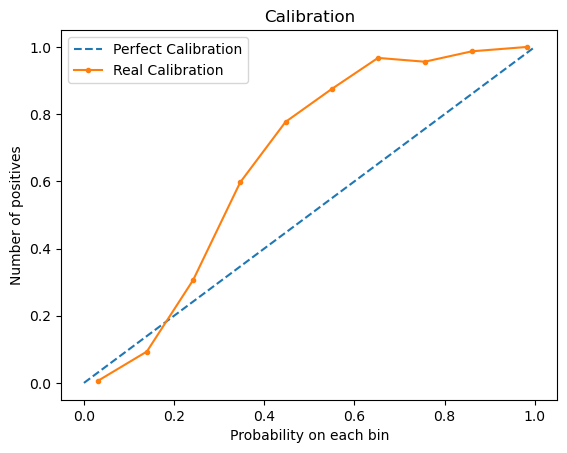

In [85]:
calibration(y_train, y_train_pred)

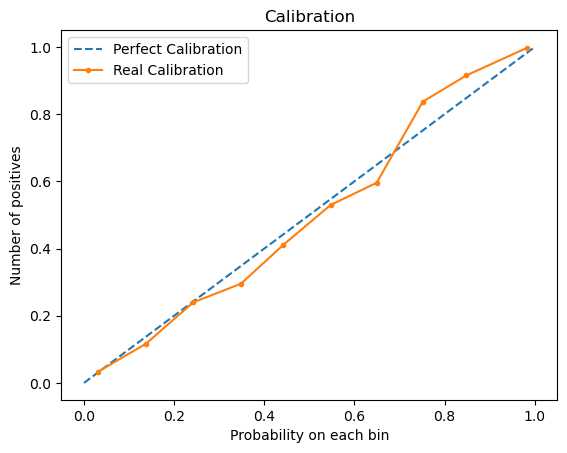

In [86]:
calibration(y_val, y_val_pred)

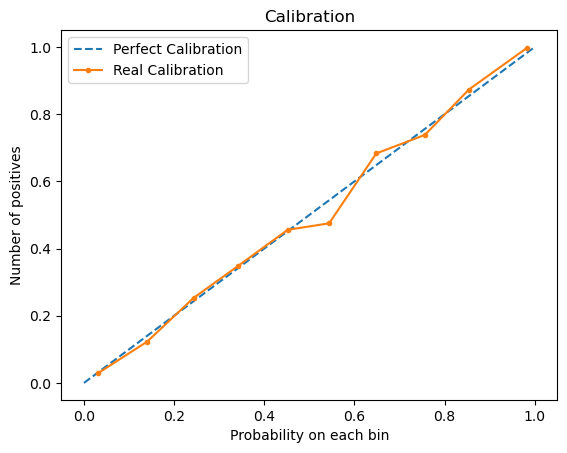

In [87]:
calibration(y_test, y_test_pred)

### viii. Feature Importance

In [88]:
fi = pd.DataFrame(zip(clf.feature_names_in_, clf.feature_importances_))
fi = fi.rename(columns = {0: 'name', 1: 'importance'})
fi['importance'] = round(fi['importance']*100, 2)
fi = fi.sort_values(by = ['importance'], ascending = False)

In [89]:
fi

,name,importance
0,person_home_ownership,20.629999
6,loan_grade_C,12.780000
13,loan_percent_income,11.870000
7,loan_grade_D,8.850000
4,loan_grade_A,6.620000
15,loan_int_rate,6.190000
1,loan_intent,5.540000
12,person_income,3.810000
10,loan_grade_G,3.600000
8,loan_grade_E,3.270000


### Time of execution

In [90]:
end = time.time()

In [91]:
delta = (end - start)

hours = int(delta/3600)
mins = int((delta - hours*3600)/60)
segs = int(delta - hours*3600 - mins*60)
print(f'Execute this notebook take us {hours} hours, {mins} minutes and {segs} seconds.')

Execute this notebook take us 0 hours, 0 minutes and 38 seconds.
